<a href="https://colab.research.google.com/github/JNSDKV/EDA-HOTEL-ANALYSIS/blob/main/EDA_HOTEL_BOOKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - HOTEL BOOKING ANALYSIS



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Contributor**    - PERWEZ ALAM

# **Project Summary -**



The hotel booking dataset provided contains valuable information that can help us answer several questions related to hotel bookings. This dataset includes information about two types of hotels, a city hotel and a resort hotel, and provides information on various aspects such as booking date, length of stay, number of guests, parking availability, and other important factors that influence bookings.
By analyzing the data, we can determine the best time of year to book a hotel room, the optimal length of stay to get the best daily rate, and whether or not a hotel is likely to receive a disproportionately high number of special requests. We can also identify key factors that govern bookings, such as the number of guests, length of stay, and availability of parking.
To begin exploring this data set, we can start by examining the distribution of bookings by hotel type, season, and length of stay. We can also analyze the correlation between the booking date and daily rate to determine whether booking in advance is more cost-effective.
Moreover, we can also use this data to identify trends and patterns that can help hotels optimize their pricing and marketing strategies. For example, if we find that the majority of bookings are made within a certain timeframe, hotels can adjust their pricing and promotional strategies accordingly to attract more bookings during that period.

Overall, this hotel booking dataset provides valuable insights into the factors that govern bookings and can help hotels make data-driven decisions to optimize their operations and maximize their revenue. By exploring and analyzing this data, we can gain a better understanding of customer preferences and behavior and develop effective strategies to improve the overall customer experience.



# **GitHub Link -**

https://github.com/JNSDKV/EDA-HOTEL-ANALYSIS/blob/main/EDA_HOTEL_BOOKING.ipynb

# **Problem Statement**


The problem statement for this hotel booking dataset is to explore and analyze the data to discover important factors that govern hotel bookings. Specifically, we want to answer questions such as when the best time of year to book a hotel room is, the optimal length of stay to get the best daily rate, and whether or not a hotel is likely to receive a disproportionately high number of special requests. We also want to identify key factors that influence bookings, such as the number of guests, length of stay, and availability of parking.

The insights gained from this analysis can help hotels make data-driven decisions to optimize their operations and maximize their revenue. By identifying trends and patterns in the data, hotels can adjust their pricing and marketing strategies to attract more bookings during peak periods, better understand customer preferences and behavior, and improve the overall customer experience.

Moreover, the analysis can help hotels prepare for future demand and make better use of their resources, such as by optimizing staffing levels and parking availability. Ultimately, the problem statement is to use data analysis to help hotels make informed decisions that can lead to improved performance and greater success in the competitive hospitality industry.

#### **Define Your Business Objective?**

We are provided with a hotel bookings dataset.

Our main objective is perform EDA on the given dataset and draw useful conclusions about general trends in hotel bookings and how factors governing hotel bookings interact with each other.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# ignore warnings
import warnings    
warnings.filterwarnings('ignore')

# Modules for dataframe and ndarrays and maths
import pandas as pd
import numpy as np
from datetime import datetime
import math
from scipy.stats import *


# visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import plotly.express as px
from matplotlib.lines import Line2D
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(15,6),'figure.dpi':70})

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings (4).csv')

### Dataset First View

In [4]:
# Dataset First Look
#To check dataset we can use-: 
#1. head()- gives rows from upper
#2. tail()- gives rows from lower
#3. sample()- gives rows randomly(useful for check bias in dataset)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [69]:
# Dataset Info
# Info function will give high level information about dataset like-:
# 1. total no of columns
# 2. total no of missing value present in each columns
# 3. datatype of data present in each columns
# 4. gives memory occupy of dataset in ram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

31994

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
null_values = df.isnull().sum()
null_values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# Total null values
null_values.sum()

129425

<Axes: >

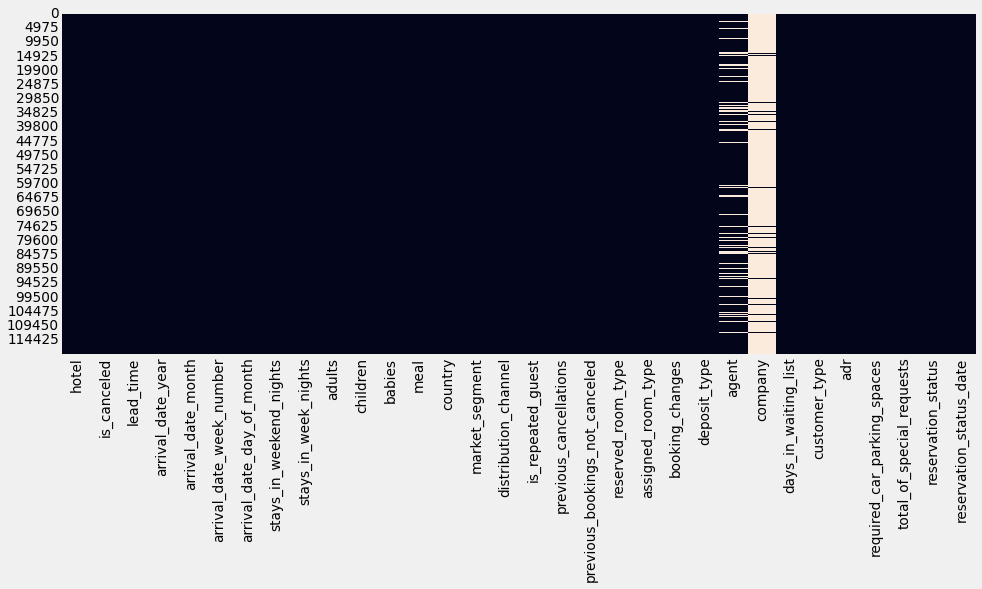

In [11]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The above dataset has 119390 rows and 32 columns. There are mising values in columns like country, agent and company. Also there are 31994 duplicate values in the dataset.
 There are 129425 null values in the dataset, 488 null values in country column, 16340 null values in agent column ,116425 null values in company column. so we need to handle the null values.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [13]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description 

The columns and the data it represents are listed below:

hotel : Name of the hotel (Resort Hotel or City Hotel)

is_canceled : If the booking was canceled (1) or not (0)

lead_time : Number of days before the actual arrival of the guests

arrival_date_year : Year of arrival date

arrival_date_month : Month of month arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

stays_in_week_nights : Number of weeknights (Monday to Friday) spent at the hotel by the guests.

adults : Number of adults among guests

children : Number of children among guests

babies : Number of babies among guests

meal : Type of meal booked

country : Country of guests

market_segment : Designation of market segment

distribution_channel : Name of booking distribution channel

is_repeated_guest : If the booking was from a repeated guest (1) or not (0)

previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type : Code of room type reserved

assigned_room_type : Code of room type assigned

booking_changes : Number of changes/amendments made to the booking

deposit_type : Type of the deposit made by the guest

agent : ID of travel agent who made the booking

company : ID of the company that made the booking

days_in_waiting_list : Number of days the booking was in the waiting list

customer_type : Type of customer, assuming one of four categories

adr : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces : Number of car parking spaces required by the customer

total_of_special_requests : Number of special requests made by the customer

reservation_status : Reservation status (Canceled, Check-Out or No-Show)

reservation_status_date : Date at which the last reservation status was updated

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

In [15]:
print(df.apply(lambda col: col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

In [16]:
# Separate continuous and categorical variables
continuous_vars = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                   'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
                   'adr', 'required_car_parking_spaces', 'total_of_special_requests']

categorical_vars = ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
                    'arrival_date_day_of_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                    'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent',
                    'company', 'customer_type', 'reservation_status', 'reservation_status_date']

# Print the continuous variables
print("Continuous Variables:")
print(continuous_vars)

# Print the categorical variables
print("Categorical Variables:")
print(categorical_vars)


Continuous Variables:
['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Categorical Variables:
['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status', 'reservation_status_date']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
df1= df.copy()

## **Removing duplicate rows if any**

In [18]:
# handling duplicate values
df1[df1.duplicated()].shape

(31994, 32)

In [19]:
# dropping duplicate values
df1.drop_duplicates(inplace = True)
df1[df1.duplicated()].shape

(0, 32)

In [20]:
df1.shape

(87396, 32)

## **Handling missing values.**

In [21]:
null_df= pd.DataFrame({"Total Values": df.shape[0] , "Total Null values": df.isnull().sum(),"%a of Null values" : round((df.isnull().sum()/ df.shape[0])*100 , 4) })
null_df.sort_values("Total Null values" , ascending = False)[:10]

,Total Values,Total Null values,%a of Null values
company,119390,112593,94.3069
agent,119390,16340,13.6862
country,119390,488,0.4087
children,119390,4,0.0034
reserved_room_type,119390,0,0.0000
assigned_room_type,119390,0,0.0000
booking_changes,119390,0,0.0000
deposit_type,119390,0,0.0000
hotel,119390,0,0.0000
previous_cancellations,119390,0,0.0000


In [22]:
# Handling missing values
# columns having missing values
df1.isnull().sum().sort_values(ascending = False)[0:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [23]:
# There are 4 columns in which null values are present , so we need to handle this.
# There are 94% null values in company column. So, it is better to drop this column.
df1.drop(columns=['company'],inplace=True)

In [24]:
# Null values in columns agent were replaced by 0.
df1['agent'] = df1['agent'].fillna(0)

In [25]:
# children column
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [26]:
children_values = df1['children'].unique()
print(np.array2string(children_values, separator=','))

[ 0., 1., 2.,10., 3.,nan]


The "children" column contains a value of 0, indicating that no children were present in the group of customers who made the transaction. However, there are also some missing values represented as "nan" which are likely due to errors in recording the data. To address this, we will replace the null values with the mean value of the "children" column. This approach can help to ensure that missing data is handled appropriately and can prevent any bias that may arise from excluding rows with missing values.

In [27]:
# Null values in column children were replaced by the mean of the column.
df1['children'].fillna(df1['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of origin of customer.
Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [28]:
# Null values in column country were replaced by 'others'
df1['country'].fillna('others', inplace = True)

In [29]:
# Checking if all null values are removed or not
df1.isnull().sum().sort_values(ascending = False)[:5]

hotel                          0
is_repeated_guest              0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

`**Finally we dont have any null values in the dataset**`

In [30]:
# There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape


(166, 31)

In [31]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

In [32]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(0, 31)

### **Converting columns to appropriate datatypes**.

In [33]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'agent']] = df1[['children', 'agent']].astype('int64')

In [34]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  b

## **Adding important columns.**

In [36]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

In [37]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

`We are adding this column so that we can analyse the stay length at hotels`

In [38]:
df1.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2


### What all manipulations have you done and insights you found?

In the hotel booking dataset, we performed several data manipulations including:

1.Removed duplicate rows: We identified and removed any duplicate rows in the dataset to ensure that each row represents a unique booking transaction.

2.Handled missing values: We identified columns with missing values and replaced them with appropriate values. For example, we replaced null values in the "children" column with the mean value and null values in the "agent" columns with 0. We also replaced null values in the "country" column with the mode of the column.

3.Converted columns to appropriate datatypes: We converted certain columns to their appropriate data types to ensure consistency and accuracy in the dataset. For example, we converted the "arrival_date" column to a datetime format, the "children" column to an integer data type, and the "meal" column to a categorical data type.

4.Added important columns: We added columns that could provide additional insights or context to the dataset. For example, we added a "total_nights" column by summing the "stays_in_weekend_nights" and "stays_in_week_nights" columns, and a Adding total people num as column, i.e. total people num = num of adults + children + babies

5.Removed rows with zero values for the total number of adults, children, or babies, as such rows may not represent valid booking transactions.

These manipulations help to ensure that the dataset is accurate, complete, and consistent, which can help to derive more meaningful insights from the data. Some potential insights that could be obtained from the cleaned dataset include patterns in booking behavior, factors that influence booking cancellations, and variations in revenue across different regions or seasons.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 UNIVARIATE ANALYSIS

In [39]:
# Chart - 1 visualization code
df1['hotel'].value_counts()

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

<Axes: >

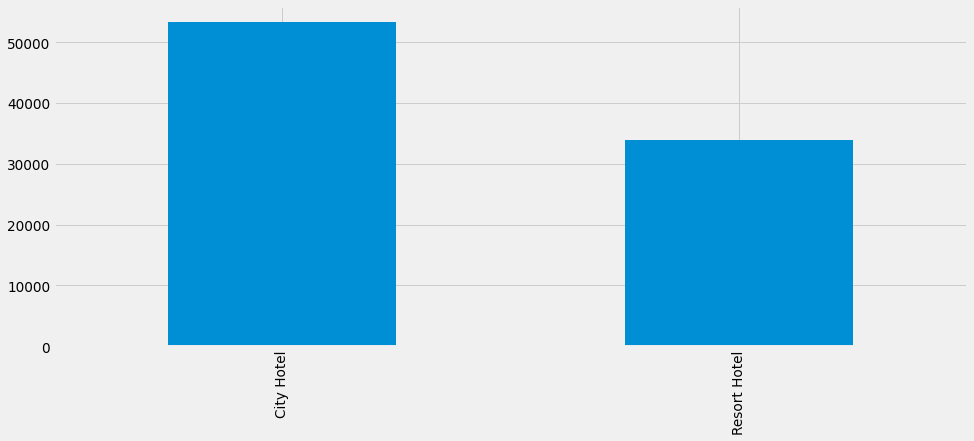

In [40]:
df1['hotel'].value_counts().plot(kind='bar')

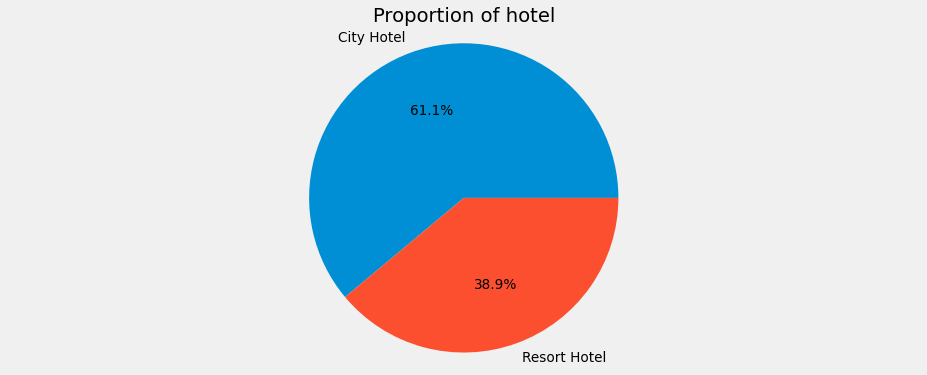

In [41]:
#df1['hotel'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.pie(df1['hotel'].value_counts(), labels=df1['hotel'].value_counts().index, autopct='%0.1f%%')
plt.title('Proportion of hotel')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

1. Because we are doing univariate analysis on categorical Column(i.e Hotel)
2. For categorical variables Bar chart is best option.
3. And also plot a pie chart to show % of bookings of each hotel.

##### 2. What is/are the insight(s) found from the chart?

**Number of bookings for City Hotel is 1.6 times more than that of Resort Hotel. City Hotel seems to be more preferred among travellers.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.**

#### Chart - 2

In [42]:
# Chart - 2 visualization code
# is_cancelled

In [43]:
df1['is_canceled'].value_counts()


0    63221
1    24009
Name: is_canceled, dtype: int64

<Axes: >

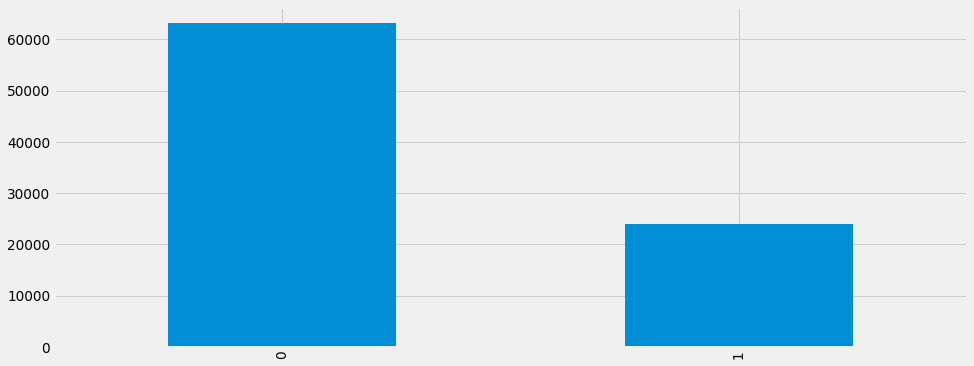

In [44]:
df1['is_canceled'].value_counts().plot(kind='bar')

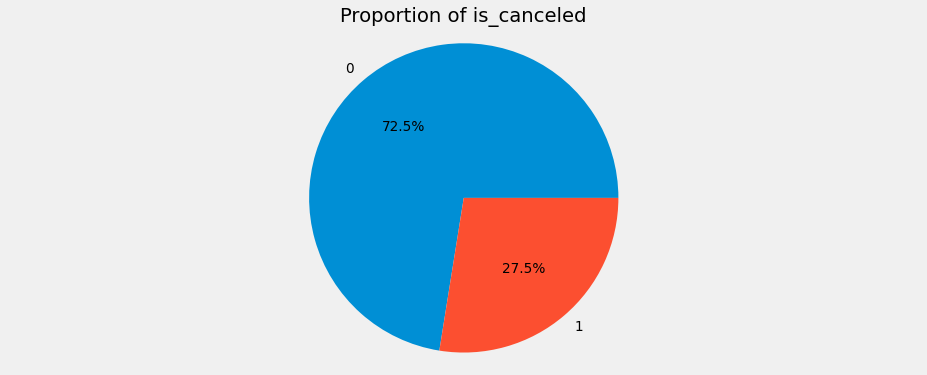

In [45]:
plt.pie(df1['is_canceled'].value_counts(), labels=df1['is_canceled'].value_counts().index, autopct='%0.1f%%')
plt.title('Proportion of is_canceled')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

1. **Because we are doing univariate analysis on categorical Column(i.e         is_cancelled)**

2.  **For categorical variables Bar chart is best option.**
3.  **And also plot a pie chart to show % of canceled booking**. 

##### 2. What is/are the insight(s) found from the chart?

1. **We can see that around one-fourth of the total bookings get cancelled**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**We need to focus on these and Monitor where the cancellations are coming from such as Market Segment, distribution channels, etc."Yes!" By gaining a better understanding of customer cancellation behavior, hotels can optimize their pricing and marketing strategies to reduce cancellations and increase bookings.**

#### Chart - 3

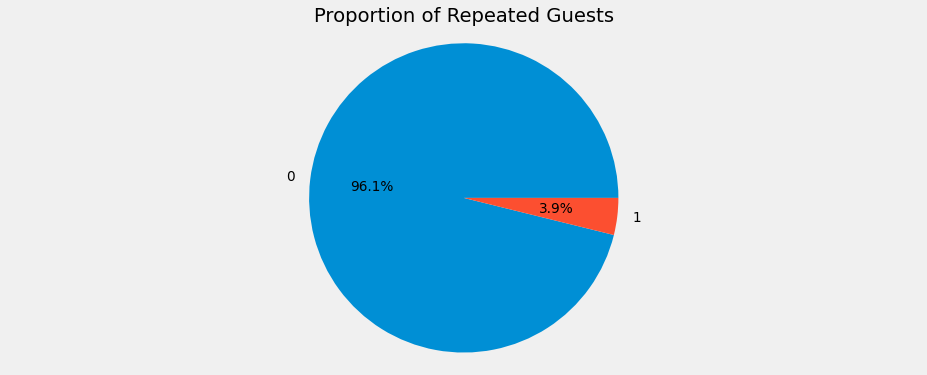

In [46]:
# Chart - 3 visualization code
# Lets take a look at how many of these booking were made by repeated guests.
# plot a pie chart to show % of repeated guests

#plt.figure(figsize=(6,6))
plt.pie(df1['is_repeated_guest'].value_counts(), labels=df1['is_repeated_guest'].value_counts().index, autopct='%0.1f%%')
plt.title('Proportion of Repeated Guests')
plt.axis('equal')
plt.show()


<Axes: >

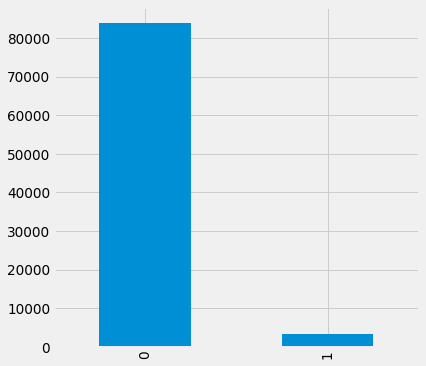

In [47]:
plt.figure(figsize=(6,6))
df1['is_repeated_guest'].value_counts().plot(kind='bar')

##### 1. Why did you pick the specific chart?

1. Because we are doing univariate analysis on categorical Column i.e (is_repeated guest)
2. For categorical variables Bar chart is best option.
3. And also plot a pie chart to show % of repeated guest.

##### 2. What is/are the insight(s) found from the chart?

  **Only a very small percentage (around 4%) of bookings are made by repeated guests**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 **The insight gained from the chart is that a very small percentage (around 4%) of bookings are made by repeated guests.**

**This insight can potentially help in creating a positive business impact as the hotel can focus on attracting and retaining repeat customers, who may be more loyal and potentially generate more revenue for the hotel.**

**There are no specific insights in this case that lead to negative growth. However, if the hotel were to ignore the insight gained from this analysis and not focus on attracting repeat customers, it could potentially lead to a negative impact on business growth**.

#### Chart - 4

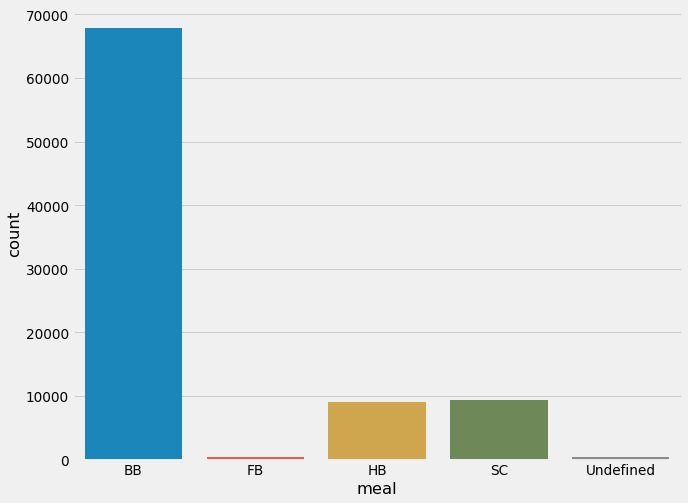

In [48]:
# Chart - 4 visualization code
# meal
plt.figure( figsize=(10, 8))

sns.countplot(x = df1['meal'])
plt.show()

##### 1. Why did you pick the specific chart?

1. **Because we are doing univariate analysis on categorical Column i.e (meal)**
2.  **For categorical variables Bar chart is best option**.


##### 2. What is/are the insight(s) found from the chart?

**Most preferred meal type is BB (Bed and breakfast).**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The insight gained from the chart is that the most preferred meal type is BB (Bed and breakfast). This information can be useful for hotel management in terms of inventory management and menu planning. However, it is unclear whether this insight alone can create a positive business impact without additional analysis or action. There is no information in the chart that suggests negative growth.**

#### Chart - 5

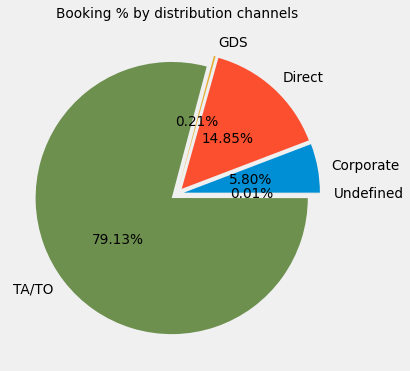

In [49]:
# Chart - 5 visualization code
# distribution channel
group_by_dc = df1.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (6,6))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

 ##### 1. Why did you pick the specific chart?

* Because we are doing univariate analysis on categorical Column i.e (disrtibution channel)
* For categorical variables plot a pie chart to show % of distribution channel.

##### 2. What is/are the insight(s) found from the chart?

* TA/TO is the most common channel for booking hotels.
* Almost 80% of the total booking.

#### Chart - 6

<Axes: >

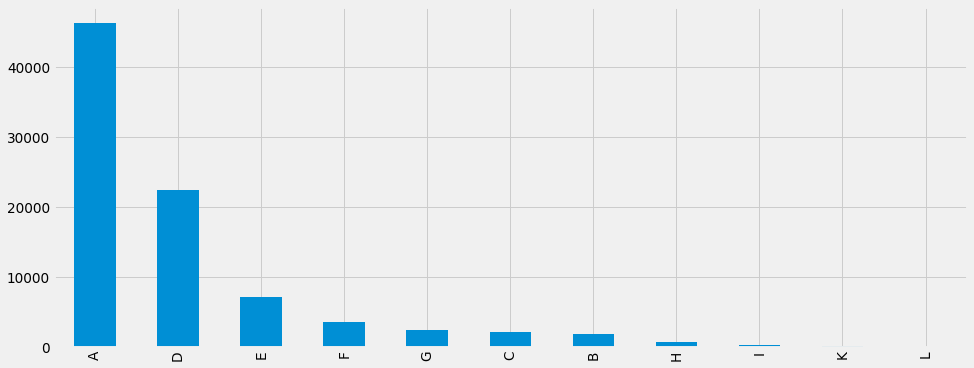

In [50]:
# Chart - 6 visualization code
# asigned room type
df1['assigned_room_type'].value_counts().plot(kind='bar')

<Axes: ylabel='assigned_room_type'>

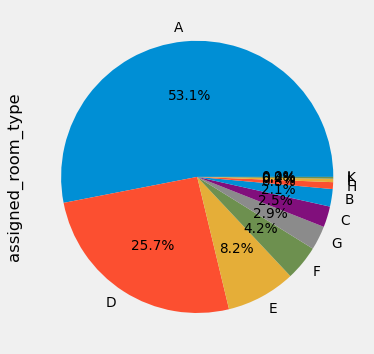

In [51]:
df1['assigned_room_type'].value_counts().plot(kind='pie', autopct='%0.1f%%')

##### 1. Why did you pick the specific chart?

1. **Because we are doing univariate analysis on categorical Column i.e (assigned_room_type)**
2.  **For categorical variables Bar chart is best option**.
3. **And also plot a pie chart to show % of assigned_room_type**

##### 2. What is/are the insight(s) found from the chart?

**Most demanded room type is A, Almost 55%. Hotels should increase the no. of room types A and D to maximise revenue**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The insight from the chart is that the most demanded room type is A and comprises almost 55% of the total room types booked. To maximize revenue, hotels should increase the number of room types A and D. This insight could help create a positive business impact by allowing hotels to better allocate their resources and cater to the preferences of their customers. There are no insights from this chart that lead to negative growth.**

#### Chart - 7

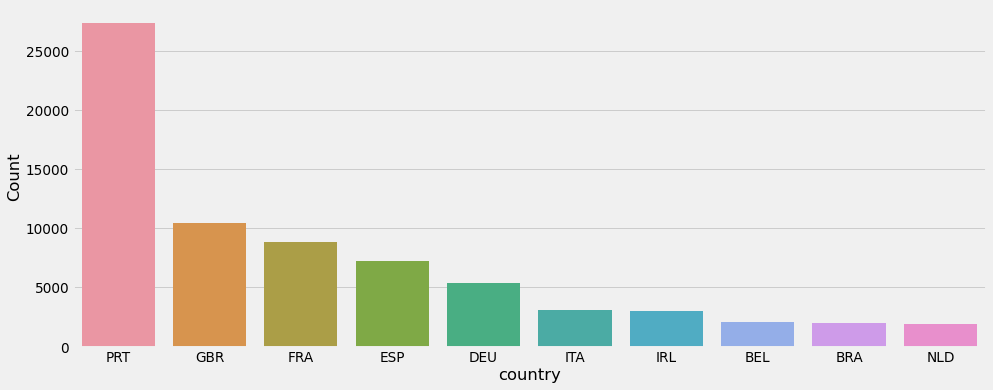

In [52]:
# Chart - 7 visualization code
#country
grouped_by_country = df1.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

##### 1. Why did you pick the specific chart?



1. **Because we are doing univariate analysis on categorical Column i.e (country)**
2.  **For categorical variables Bar chart is best option**.

##### 2. What is/are the insight(s) found from the chart?

**Most guest are from Portugal and other Europian contrie**s.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


**The specific chart, a bar chart, was chosen because it is suitable for analyzing the distribution of guests by country, which is a categorical variable. The insight gained from the chart is that the majority of guests are from Portugal and other European countries. This information can be valuable for the hotel to tailor its services and marketing efforts to cater to the preferences of these guests. However, it does not directly indicate positive or negative growth. To determine the business impact, other factors such as booking trends, revenue, and customer satisfaction need to be considered over time.**

#### Chart - 8
## **BIVARIATE ANALYSIS**

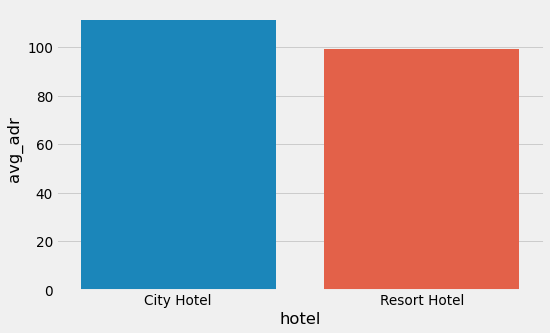

In [53]:
# Chart - 8 visualization code
#Lets take a look at which hotel seems to make more revenue?
grouped_by_hotel = df1.groupby('hotel')
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

##### 1. Why did you pick the specific chart?

**I picked a bar chart to show the average daily rate (ADR) for each hotel, because we are doing bivariate analysis of Numerical-Categorical Column. This chart helps to compare the ADR of City and Resort hotels visually. It is a simple and effective way to present this information to stakeholders. By using a bar chart, we can easily identify which hotel has a higher ADR, and the difference between the two hotels' ADRs. This helps in making informed business decisions about pricing strategies and marketing efforts for each hotel.**


##### 2. What is/are the insight(s) found from the chart?

**Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The gained insight that the City hotel makes more revenue due to higher overall adr and number of bookings can have a positive impact on the business as the hotel management can focus on maximizing the revenue of the City hotel further. However, if the Resort hotel is not performing well, this insight can also lead to negative growth as it may result in less investment or resources being allocated to the Resort hotel. Therefore, it is important to consider the performance and potential of both hotels before making any decisions based on this insight.**

#### Chart - 9

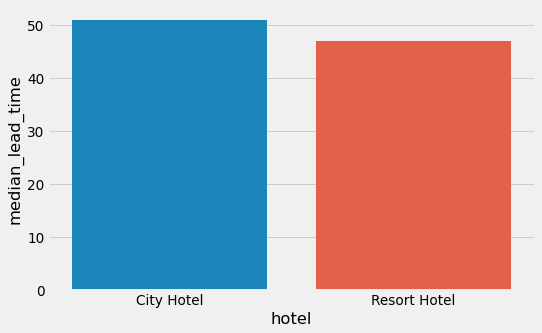

In [54]:
# Chart - 9 visualization
# Lets have a look at Which hotel has higher lead time.
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.show()

##### 1. Why did you pick the specific chart?

**I picked this specific chart to compare the median lead time of the bookings for the City hotel and Resort hotel, because doing a bivariate analysis of (N-C)Columns .The bar plot helps in visualizing the difference in the median lead time for each hotel type, allowing for quick comparisons. The plot also helps in understanding if there is any difference in the booking patterns of the two hotel types.**

##### 2. What is/are the insight(s) found from the chart?

**City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The gained insight that City hotel has a higher median lead time than the Resort hotel can help in creating a positive business impact. This can help the hotel management in better managing their operations and resources, as they can anticipate the demand for the future and plan accordingly**.

**For instance, if the management knows that City hotel typically has a higher lead time than Resort hotel, they can plan their staffing needs, inventory levels, and other resources accordingly. This can help in avoiding overbooking, under-staffing, and other issues that can negatively impact the customer experience**.

**However, there are no insights that lead to negative growth in this case**. 

#### Chart - 10

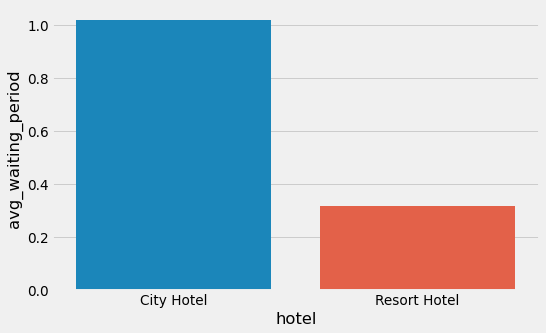

In [55]:
# Chart - 10 visualization code
# Lets have take a look at Which hotel has longer waiting time?.
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()


##### 1. Why did you pick the specific chart?

**I pick this specific chart to visualize the average waiting period for each hotel, which helps to compare the waiting time between the two hotels. A bar chart is an appropriate choice to compare the average waiting period between two categorical variables(C-C), in this case, the hotels.**

##### 2. What is/are the insight(s) found from the chart?

**City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The insights gained from the chart show that Resort hotels have a slightly longer waiting period than City hotels. This information can help in managing the reservation process and staff allocation more efficiently to reduce waiting time for guests. Additionally, the management can consider offering discounts or promotions for guests who book in advance to avoid waiting on the waiting list.**

**As for negative growth, a long waiting period can potentially discourage potential customers from booking a stay at the hotel, especially for those who are looking for a last-minute booking. It can also lead to negative reviews and ratings, which can ultimately harm the hotel's reputation and lead to a decrease in bookings. Therefore, it is essential to keep the waiting period as low as possible to ensure a positive impact on the business.**

#### Chart - 11

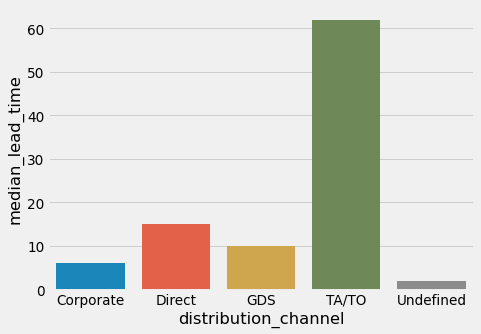

In [56]:
# Chart - 11 visualization code
#Lets see Which channel is mostly used for early booking of hotels?
group_by_dc = df1.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()



##### 1. Why did you pick the specific chart?


I pick this chart to show the median lead time for hotel bookings across different distribution channels. It helps visualize which channel is mostly used for early bookings by comparing the lead time values. The chart provides a clear and concise representation of the distribution channels and their corresponding lead times, allowing for easy interpretation of the data.


##### 2. What is/are the insight(s) found from the chart?

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 This insight can help hotels and travel businesses in several ways:

Positive Business Impact: 

* **Targeted Marketing**: Hotels can focus their marketing efforts on TA/TO channels to attract customers who prefer early bookings and leverage partnerships with travel agents and tour operators.

* **Revenue Optimization**: By understanding the preference for early bookings through TA/TO channels, hotels can offer attractive deals and promotions specifically tailored for these channels to drive more bookings and revenue.

#### Chart - 12

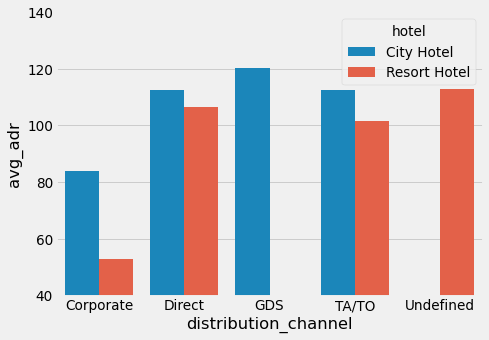

In [57]:
# Chart - 12 visualization code
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

##### 1. Why did you pick the specific chart?

 I pick this specific chart to visualize the avg adr for each distribution channel and Which distribution channel brings better revenue generating deals for hotels.

##### 2. What is/are the insight(s) found from the chart



GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

* Resort hotel has more revnue generating deals by direct and TA/TO channel. 
* Resort Hotel need to increase outreach on GDS channel to increase revenue.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 These insights have the potential to create a positive business impact. By capitalizing on the distribution channels that bring higher revenue generating deals and strategically focusing on GDS channels, both the City hotel and the Resort hotel can increase their revenue and profitability.

 Regarding negative growth, based on the insights provided, there is no specific insight that indicates a negative impact. However, it's important to consider other factors and conduct a comprehensive analysis to identify any potential negative implications. Factors such as cost, operational efficiency, customer satisfaction, and market trends should also be taken into account to ensure a holistic evaluation of the business impact.



#### Chart - 13

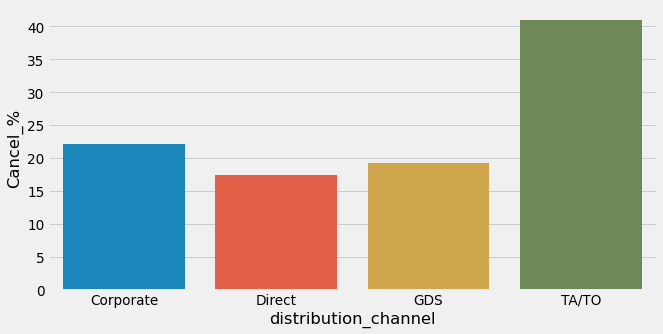

In [58]:
# Chart - 13  visualization code
# Perform groupby operation on the 'distribution_channel' column
group_by_dc = df.groupby('distribution_channel')

# Calculate the cancellation percentage and create a new DataFrame
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum() / group_by_dc.size()) * 100)

# Check if 'Undefined' label exists in the index before dropping it
if 'Undefined' in d1.index:
    d1 = d1.drop(index='Undefined')

# Rename the column to 'Cancel_%'
d1 = d1.rename(columns={0: 'Cancel_%'})

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=d1.index, y=d1['Cancel_%'])
plt.show()


##### 1. Why did you pick the specific chart?

**I picked this chart to analyze Which significant distribution channel has highest cancellation percentage?** 

##### 2. What is/are the insight(s) found from the chart

**TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The gained insight can potentially have a positive business impact. By identifying that the TA/TO distribution channel has the highest cancellation percentage, businesses can focus on analyzing the reasons behind these cancellations and take steps to mitigate them. It may involve improving the booking process, enhancing communication with the travel agents or tour operators, or offering incentives to encourage customers to follow through with their bookings.**

Let us see what causes the cancelation of bookings of rooms by customers \
 \
 One question can arise that may be longer waiting period or longer lead time causes the cancellation of bookings, let us check that.

#### Chart - 14

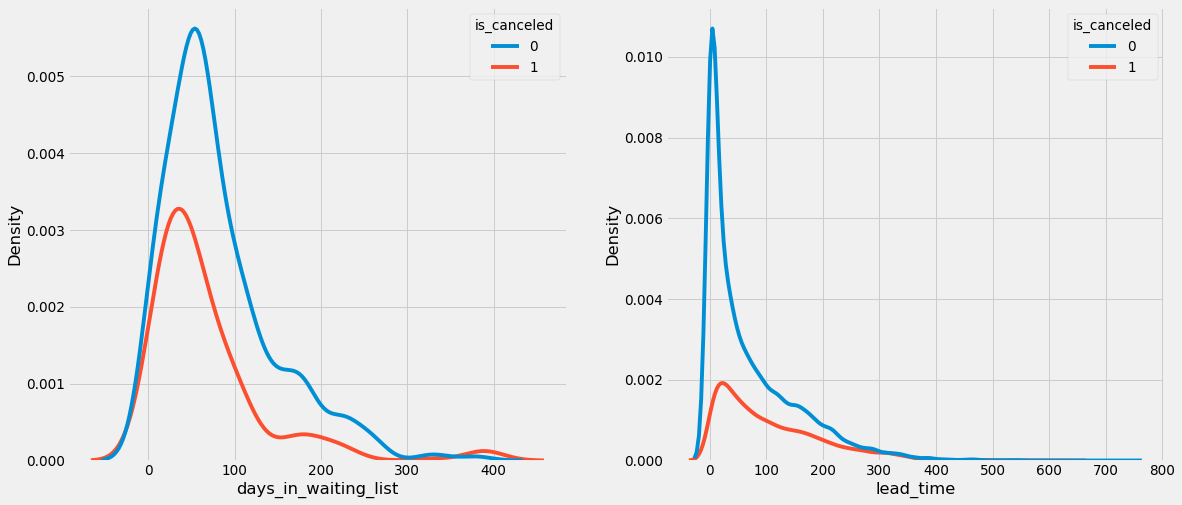

In [59]:
# Chart - 14  visualization code
waiting_bookings = df1[df1['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df1['lead_time'], hue = df1['is_canceled'])
plt.show()

##### 1. Why did you pick the specific chart?

**I selected two kernel density estimation (KDE) plots side by side. One plot represents the distribution of waiting time for bookings with non-zero waiting time, while the other plot represents the distribution of lead time for all bookings. These plots were chosen to visualize the distribution of waiting and lead times and examine the relationship with booking cancellations.**

##### 2. What is/are the insight(s) found from the chart

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.

Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The gained insights can potentially help create a positive business impact. By analyzing the waiting time and lead time distributions in relation to booking cancellations, businesses can identify patterns or differences that may provide insights into customer behavior and potential factors influencing cancellations**.

#### Chart - 15

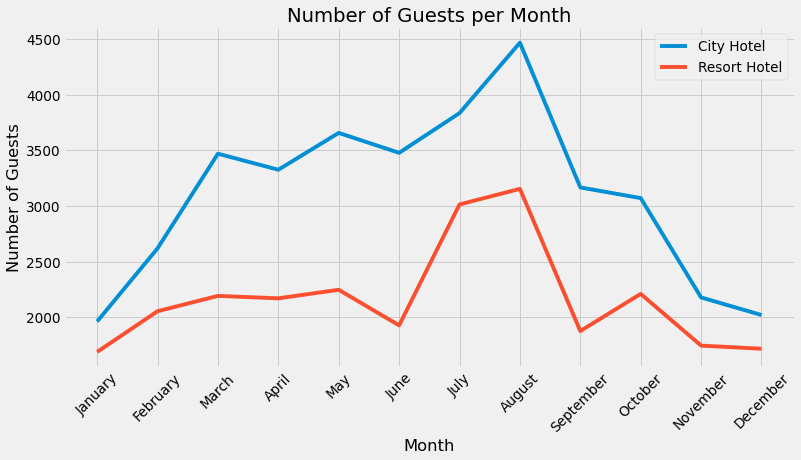

In [60]:
# Chart - 15  visualization code
# Filter the data for the city hotel and non-canceled bookings
city_data = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]

# Filter the data for the resort hotel and non-canceled bookings
resort_data = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]

# Calculate the number of guests per month for the city hotel
city_guests_per_month = city_data['arrival_date_month'].value_counts().reset_index()
city_guests_per_month.columns = ['Month', 'Number of Guests']

# Calculate the number of guests per month for the resort hotel
resort_guests_per_month = resort_data['arrival_date_month'].value_counts().reset_index()
resort_guests_per_month.columns = ['Month', 'Number of Guests']

# Define the order of months for proper sorting
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
city_guests_per_month['Month'] = pd.Categorical(city_guests_per_month['Month'], categories=months, ordered=True)
resort_guests_per_month['Month'] = pd.Categorical(resort_guests_per_month['Month'], categories=months, ordered=True)

# Sort the data by month
city_guests_per_month = city_guests_per_month.sort_values('Month')
resort_guests_per_month = resort_guests_per_month.sort_values('Month')

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=city_guests_per_month, x='Month', y='Number of Guests', label='City Hotel')
sns.lineplot(data=resort_guests_per_month, x='Month', y='Number of Guests', label='Resort Hotel')
plt.xlabel('Month')
plt.ylabel('Number of Guests')
plt.title('Number of Guests per Month')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

 * I pickd this chart to see Which are the most busy months. 
 * The line chart was chosen to visualize the number of guests per month for the city hotel and the resort hotel. It allows for easy comparison of the guest trends between the two hotels.



##### 2. What is/are the insight(s) found from the chart


**From the chart, it can be observed that the most number of guests visit both the city hotel and the resort hotel in the month of August. This insight indicates that August is a busy month for both hotels, suggesting potential high demand during that time.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The gained insight can potentially create a positive business impact. Knowing that August is the busiest month, hotel management can plan and allocate resources accordingly to cater to the increased demand. **

#### Chart - 16

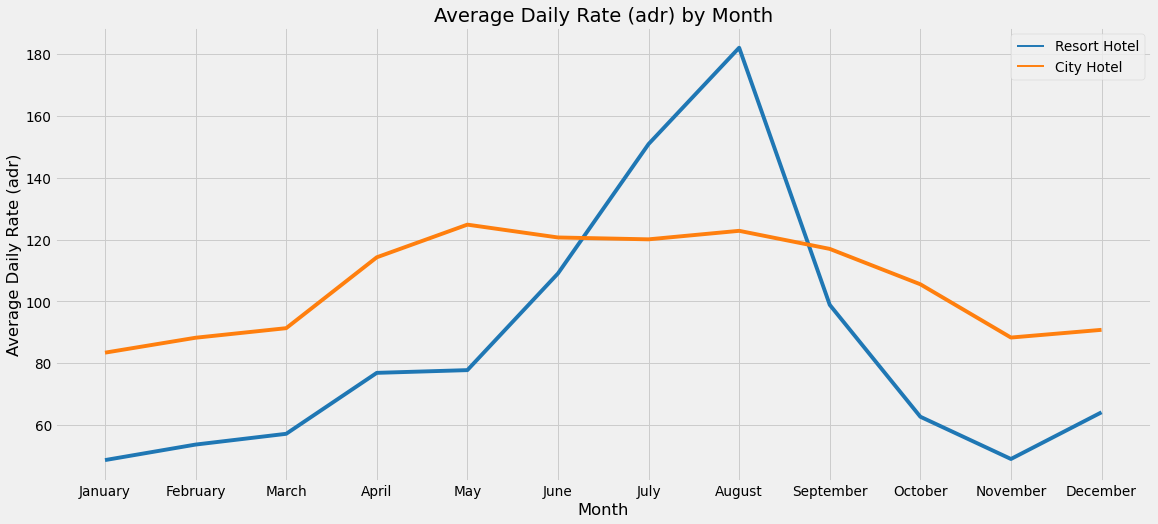

In [61]:
# Chart - 16  visualization code
#Now lets see which month results in high revenue.

# Calculate the average daily rate (adr) for resort hotel and city hotel by month
resort_hotel = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)].groupby('arrival_date_month')['adr'].mean().reset_index()
city_hotel = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)].groupby('arrival_date_month')['adr'].mean().reset_index()

# Merge the dataframes
final_hotel = resort_hotel.merge(city_hotel, on='arrival_date_month')
final_hotel.columns = ['Month', 'Price for Resort Hotel', 'Price for City Hotel']

# Set the order of months for proper sorting
final_hotel['Month'] = pd.Categorical(final_hotel['Month'], categories=months, ordered=True)

# Sort the data by month
final_hotel = final_hotel.sort_values('Month')

# Define the colors for the lineplot and legend
line_colors = ['#1f77b4', '#ff7f0e']
legend_colors = ['Resort Hotel', 'City Hotel']

# Plot the line chart
plt.figure(figsize=(18, 8))
sns.lineplot(data=final_hotel, x='Month', y='Price for Resort Hotel', color=line_colors[0])
sns.lineplot(data=final_hotel, x='Month', y='Price for City Hotel', color=line_colors[1])
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (adr)')
plt.title('Average Daily Rate (adr) by Month')

# Customize the legend colors
custom_lines = [Line2D([0], [0], color=line_colors[i], lw=2) for i in range(len(line_colors))]
plt.legend(custom_lines, legend_colors)

plt.show()




##### 1. Why did you pick the specific chart?


* The line chart was chosen to visualize the average daily rate (ADR) for the resort hotel and the city hotel by month. It allows for easy comparison of the ADR trends between the two hotels.
* The boxplot allows us to visualize the range, median, and quartiles of the ADR for each month, making it easier to identify any variations or outliers.


##### 2. What is/are the insight(s) found from the chart

* From the chart, it can be observed that the average daily rate (ADR) for both the resort hotel and the city hotel fluctuates throughout the year. There may be certain months where the ADR is higher, indicating potential peak seasons or periods of increased demand.
* Avg adr rises from beginning of year upto middle of year and reaches peak at August and then lowers to the end of year. But hotels do make some good deals with high adr at end of year also.
* Outliers in the boxplot represent extreme values that fall outside the typical range of ADR for a specific month.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact. By analyzing the ADR trends, hotel management can identify the months with higher ADR and strategize their pricing and revenue management strategies accordingly. They can focus on optimizing revenue during peak months by implementing pricing strategies, offering packages or promotions, and maximizing revenue potential.

#### Chart - 17

In [62]:
# Chart - 17  visualization code
#Lets see How long do people stay at the hotels?

filter = df1['is_canceled'] == 0
data = df1[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [63]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,2


In [64]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


<Axes: xlabel='total_nights', ylabel='Number of stays'>

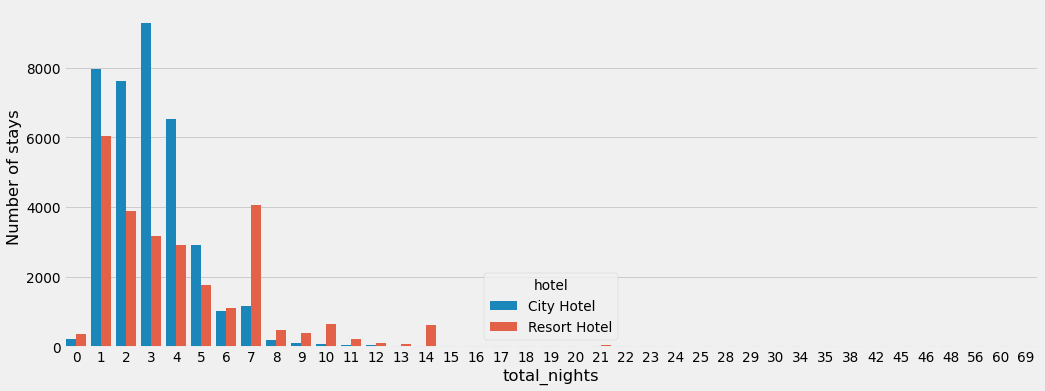

In [65]:
plt.figure(figsize = (16,6))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')

##### 1. Why did you pick the specific chart?

I picked the barplot chart to compare the number of stays based on the total nights for different hotels. This chart allows us to visualize and compare the total number of stays for each category (Resort Hotel and City Hotel) across different durations of stay.

##### 2. What is/are the insight(s) found from the chart?

Most people prefer to stay at the hotels of <=5 days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact by providing information for decision-making and strategy development.

#### Chart - 14 - Correlation Heatmap

In [66]:
# Correlation Heatmap visualization code
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

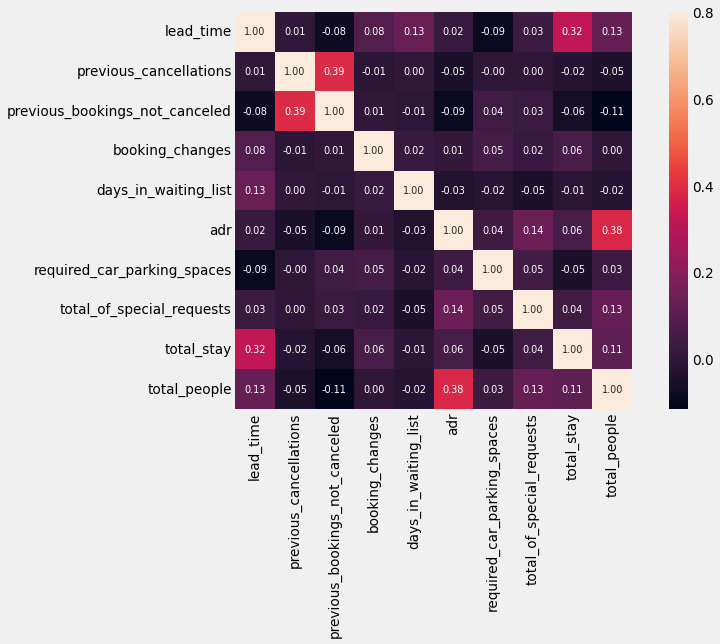

In [67]:
#correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

##### 1. Why did you pick the specific chart?

The correlation matrix heatmap is a commonly used chart to visualize the correlations between numerical variables in a dataset. It helps us understand the relationships and dependencies between different variables.

##### 2. What is/are the insight(s) found from the chart?


1) Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

#### Chart - 15 - Pair Plot 

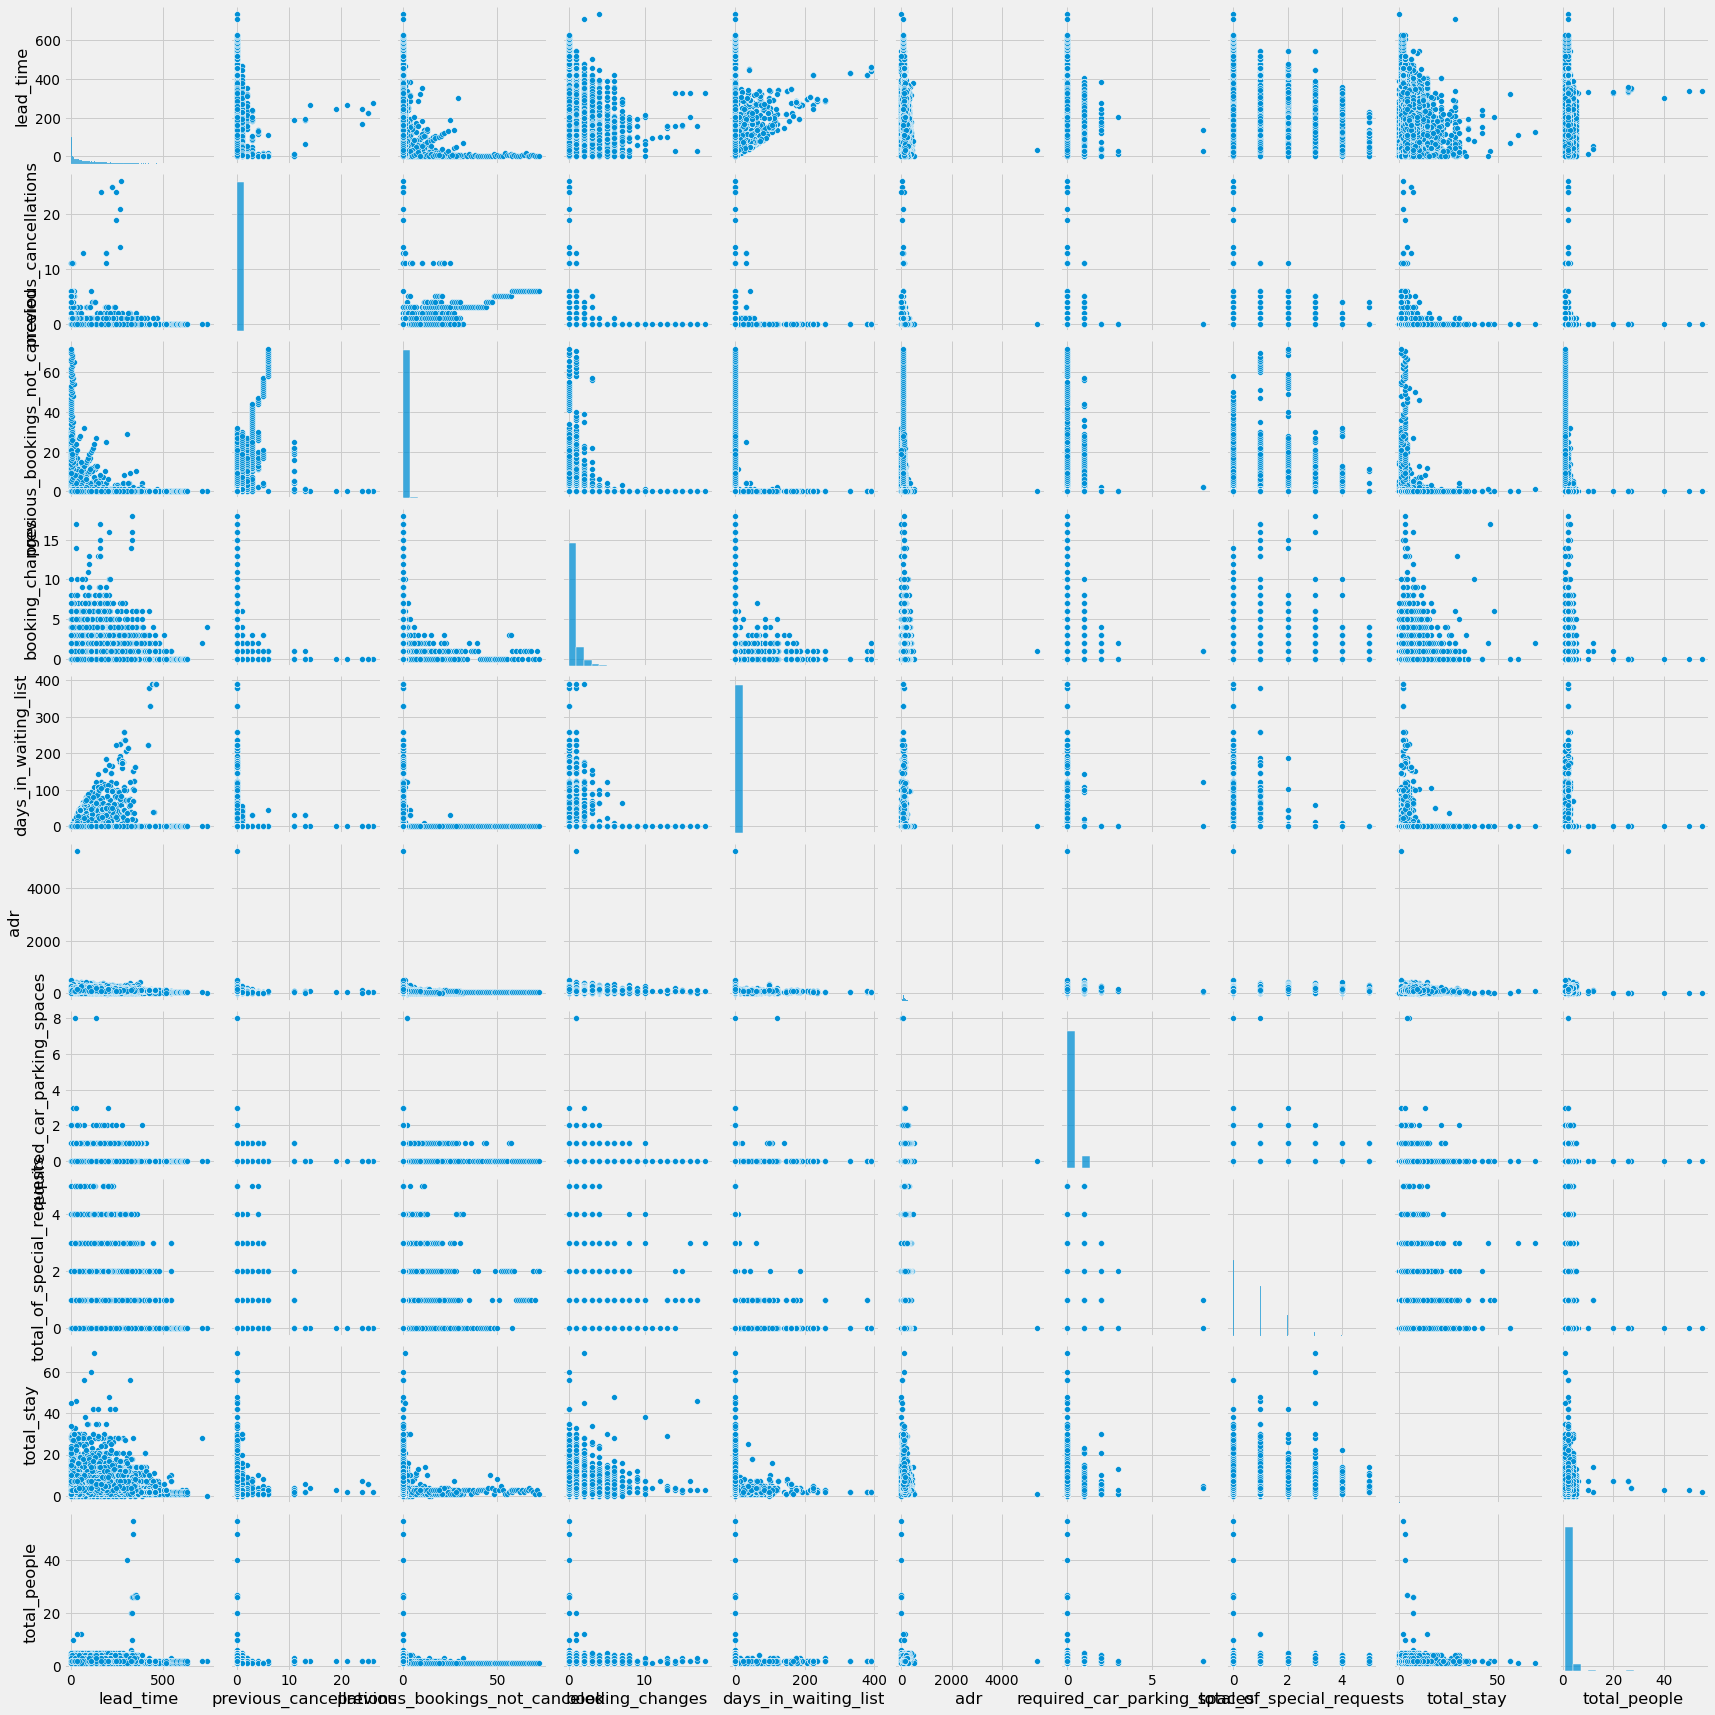

In [68]:
sns.pairplot(data=num_df1,palette="husl")
plt.show()



##### 1. Why did you pick the specific chart?

The pairplot chart is commonly used to visualize the pairwise relationships between multiple variables. Each variable is plotted against every other variable in the dataset, resulting in a grid of scatter plots. By examining the scatter plots and the diagonal line plots (which show the distribution of each variable), we can gain insights into the relationships and distributions of the variables.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that the total stay and lead time  has negative correlation.

similarly lead time and days in waiting list has also linearly correalted.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

To achieve the business objectives, the client should focus on the following key strategies:

* Reduce Cancellations: Implement measures to reduce booking cancellations by offering more flexible cancellation policies, incentives for non-refundable bookings, and improved communication during the booking process.

* Foster Guest Loyalty: Implement a loyalty program to encourage repeat bookings and enhance guest retention. Personalize offers for returning guests, provide post-stay follow-ups, and engage with guests to build long-term relationships.

* Target European Market: Allocate resources to specifically target the European market through tailored marketing campaigns, partnerships with European travel agencies, and showcasing unique offerings that appeal to European travelers.

* Optimize Revenue Management: Analyze patterns of higher ADR and lower occupancy periods to optimize pricing strategies. Offer special packages or promotions during low occupancy periods to maximize revenue and occupancy rates.

* Enhance Guest Experience: Focus on delivering exceptional guest experiences by improving customer service, personalizing interactions, and offering unique amenities or services. Differentiate the hotels from competitors and create memorable experiences for guests.

* By implementing these strategies, the client can improve booking conversions, increase guest loyalty, target the right market segment, optimize revenue, and enhance the overall guest experience.








# **Conclusion**

*  Around 60% bookings are for City hotel and 40% bookings are for Resort hotel, therefore City Hotel is busier than Resort hotel. Also the overall adr of City hotel is slightly higher than Resort hotel.
*  Mostly guests stay for less than 5 days in hotel and for longer stays Resort hotel is preferred.
*  Both hotels have significantly higher booking cancellation rates and very few guests less than 3 % return for another booking in City hotel. 5% guests return for stay in Resort hotel.
* Most of the guests came from european countries, with most of guests coming from Portugal.
* Guests use different channels for making bookings out of which most preferred way is TA/TO.
*  For hotels higher adr deals come via GDS channel, so hotels should increase their popularity on this channel.
*  Almost 30% of bookings via TA/TO are cancelled.
*  Not getting same room as reserved, longer lead time and waiting time do not affect cancellation of bookings. Although different room allotment do lowers the adr.
*  July- August are the most busier and profitable months for both of hotels. 
*  Within a month, adr gradually increases as month ends, with small sudden rise on weekends.
*  Couples are the most common guests for hotels, hence hotels can plan services according to couples needs to increase revenue.
*  More number of people in guests results in more number of special requests.
*  Bookings made via complementary market segment and adults have on average high no. of special request.
*  For customers, generally the longer stays (more than 15 days) can result in better deals in terms of low adr.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***